In [15]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def satistifies_conditions(experiment, conditions):
    """ Check if experiment hyperparameters satisfy desired conditions
    """
    hp = experiment['hyperparameters']
    
    # Check if each condition satistified
    # If not, then return false
    for key, value in conditions.items():
        if hp[key] != value:
            return False
    
    # All conditions are satisfied
    return True

In [3]:
def load_experiments_satisfying_conditions(conditions):
    """ Load all experiments that satisfy the given conditions.
    Return them as a list.
    """
    # Get all experiment filenames
    experiment_filenames = [f for f in os.listdir(os.getcwd()) if f[-5:] == '.json']
    
    # Initialize list of experiments that satisfy the conditions
    experiments_satisfactory = []
    
    # Load each experiment file
    for experiment_filename in experiment_filenames:
        with open(experiment_filename) as experiment_file:
            experiment = json.load(experiment_file)
            
            # Check if experiment satistifies conditions
            # If so, append to list of experiments satisfying the conditions
            if satistifies_conditions(experiment, conditions):
                experiments_satisfactory.append(experiment)
                
    return experiments_satisfactory

In [29]:
def get_per_epoch_performance(experiments, dataset, measure):
    assert measure in {'average_accuracy', 'average_loss'}
    assert dataset in {'train', 'test'}
    
    num_epochs = experiments[0]['hyperparameters']['epochs']
    num_experiments = len(experiments)
    
    # Initialize matrix of experiments and epochs
    performance = np.zeros((num_experiments, num_epochs))
    for i, experiment in enumerate(experiments):
        performance[i, :] = experiment['results'][dataset][measure]
        
    return performance
        

In [24]:
conditions = {
    'architecture': 'convffnn',  # 'rnn'  # 'lstm'  #
    'batch_size': 100,
    'clipping_threshold': 0.0,
    'dataset_name': 'mnist',  # 'easy_addition'  # 'simple_rnn' #
    'epochs': 3,
    'initialization_scale': '\sqrt{\frac{6}{n+m}}',  # '0.1'
    'lr': 0.1,
    'momentum': 0.0,
    'mu': 0.0,
#     'seed': 9,
    'sgdtype': 'explicit'}

In [25]:
experiments = load_experiments_satisfying_conditions(conditions)

In [26]:
experiments

[{'hyperparameters': {'architecture': 'convffnn',
   'batch_size': 100,
   'clipping_threshold': 0.0,
   'data_type': 'classification',
   'dataset_name': 'mnist',
   'epochs': 3,
   'initialization_scale': '\\sqrt{\x0crac{6}{n+m}}',
   'lr': 0.1,
   'momentum': 0.0,
   'mu': 0.0,
   'seed': 8,
   'sgdtype': 'explicit'},
  'results': {'runtime': 96.44668126106262,
   'test': {'average_accuracy': [96.61, 97.96, 98.2],
    'average_loss': [0.11134519221261144,
     0.06870078049134463,
     0.06058314834954217]},
   'train': {'average_accuracy': [96.41166666666666,
     97.655,
     98.00333333333333],
    'average_loss': [0.11887394819719097,
     0.07746965805068612,
     0.06541564535039167]}}},
 {'hyperparameters': {'architecture': 'convffnn',
   'batch_size': 100,
   'clipping_threshold': 0.0,
   'data_type': 'classification',
   'dataset_name': 'mnist',
   'epochs': 3,
   'initialization_scale': '\\sqrt{\x0crac{6}{n+m}}',
   'lr': 0.1,
   'momentum': 0.0,
   'mu': 0.0,
   'seed': 9

In [39]:
measure = 'average_accuracy'
performance = get_per_epoch_performance(experiments, 'train', measure)

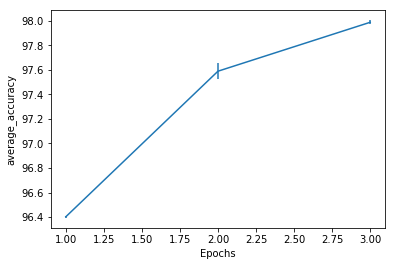

In [40]:
# Create data for plotting
epochs = performance.shape[1]
x = np.arange(1,1+epochs)
y = np.mean(performance,0)
yerr = np.std(performance,0)

# Plot!
plt.figure()
plt.errorbar(x, y, yerr=yerr)
plt.xlabel('Epochs')
plt.ylabel(measure)
plt.show()